In [0]:
from google.colab import files
import io
uploaded = files.upload()

Saving fashion_half.csv to fashion_half.csv


In [0]:
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['fashion_half.csv']))

In [0]:
#changing k's 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import time

#df = pd.read_csv('fashion-mnist_train.csv', delimiter=',', quotechar='"')
#df=df.sample(frac=0.25, replace=False)
features = df.loc[:,"pixel1":"pixel784"]
#X_train, X_test, y_train, y_test = train_test_split(features, df["label"], test_size=0.5)

X_train, X_test, y_train, y_test = train_test_split(features,df["label"], test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



#kNN
ks = range(1, 21)
train_precision = []
test_precision = []

train_recall = []
test_recall = []

train_acc = []
test_acc =[]

portion = range(10,101, 10)
print("her")
for i, k in enumerate(ks):
    start = time.time()
    clf = KNeighborsClassifier(n_neighbors = k, metric="euclidean", weights='distance')
    
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    end = len(X_train)
    print ('k ' + str(k))
    train_precision.append(precision_score(y_train, train_pred, average='macro'))
    test_precision.append(precision_score(y_test, test_pred, average='macro'))
    print("train :", train_precision)
    print("test :", test_precision)
    
    print(confusion_matrix(y_test, test_pred))
    print("time: ", time.time() - start)
    
    train_recall.append(recall_score(y_train, train_pred, average='macro'))
    test_recall.append(recall_score(y_test, test_pred, average='macro'))
    
    print("train :", train_recall)
    print("test :", test_recall)
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))
    
    print("train :", train_acc)
    print("test :", test_acc)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


her
k 1
train : [1.0]
test : [0.9794735273102322]
[[1484   11   16   12    1]
 [  21 1386    6    3    1]
 [  22    0 1497    2    0]
 [  28    0   24 1492   10]
 [   0    0    0    0 1484]]
time:  815.686615228653
train : [1.0]
test : [0.9792399885754485]
train : [1.0]
test : [0.9790666666666666]
k 2
train : [1.0, 1.0]
test : [0.9794735273102322, 0.9794735273102322]
[[1484   11   16   12    1]
 [  21 1386    6    3    1]
 [  22    0 1497    2    0]
 [  28    0   24 1492   10]
 [   0    0    0    0 1484]]
time:  1174.2032370567322
train : [1.0, 1.0]
test : [0.9792399885754485, 0.9792399885754485]
train : [1.0, 1.0]
test : [0.9790666666666666, 0.9790666666666666]
k 3
train : [1.0, 1.0, 1.0]
test : [0.9794735273102322, 0.9794735273102322, 0.9785205975556028]
[[1484    5   20   14    1]
 [  24 1381    8    3    1]
 [  20    1 1497    3    0]
 [  29    1   25 1489   10]
 [   0    0    0    0 1484]]
time:  1178.0222570896149
train : [1.0, 1.0, 1.0]
test : [0.9792399885754485, 0.979239988575

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Fashion KNN: Precision Recall and Accuracy vs K when Weighted Uniformly')
#plt.ylim((0,1))
plt.plot(ks, list(train_precision), 'o-', color='blue', label='train precision')
plt.plot(ks, list(train_recall), 'x', color='green', label='train recall', linestyle=':')
plt.plot(ks, list(train_acc), '-', label='train accuracy', color='pink')


plt.plot(ks, list(test_precision), 'o-', color='red', label='test precision')
plt.plot(ks, list(test_recall), 'x',color='orange', label='test recall', linestyle=':')

plt.plot(ks, list(test_acc), '-', label='test accuracy', color='indigo')


#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('precision_recall_knn_fashion')
plt.legend()
plt.show()
#ideal number of layers is 2 layer

In [0]:
import operator
import numpy as np
np.average(list(map(operator.sub, test_recall, test_acc)))

-0.00012062419592233642

In [0]:
val=30000*0.25
prec =[i*val for i in test_precision]
acc =[i*val for i in test_acc]
#test_acc*30000*0.25

In [0]:
test_acc

[0.9785333333333334,
 0.9749333333333333,
 0.978,
 0.9768,
 0.9773333333333334,
 0.9757333333333333,
 0.9749333333333333,
 0.9737333333333333,
 0.9732,
 0.9733333333333334,
 0.9728,
 0.9724,
 0.9722666666666666,
 0.9712,
 0.9710666666666666,
 0.9701333333333333,
 0.9701333333333333,
 0.9696,
 0.9698666666666667,
 0.9696]

In [0]:
acc

[7339.0,
 7312.0,
 7335.0,
 7326.0,
 7330.0,
 7318.0,
 7312.0,
 7303.0,
 7299.0,
 7300.0,
 7296.0,
 7293.0,
 7292.0,
 7284.0,
 7283.0,
 7276.0,
 7276.0,
 7272.0,
 7274.0,
 7272.0]

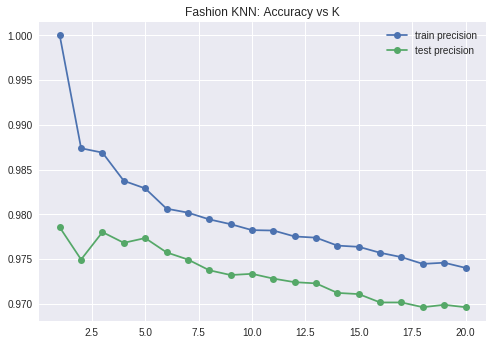

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Fashion KNN: Accuracy vs K')
#plt.ylim((0,1))
plt.plot(ks, list(train_acc), 'o-',  label='train precision')#
#plt.plot(ks, list(train_recall), 'x', color='green', label='train recall', linestyle=':')

plt.plot(ks, list(test_acc), 'o-',  label='test precision')


#plt.plot(ks, list(test_recall), 'x',color='orange', label='test recall', linestyle=':')

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('precision_recall_knn_fashion')
plt.legend()
plt.show()

In [0]:
from collections import Counter
df = pd.read_csv('fashion-mnist_train.csv', delimiter=',', quotechar='"')
cnt = Counter(df["label"]).items()
labels = set(df["label"])
percentages = {x: float(float(y) / len(df["label"]) * 100) for x, y in cnt}
for name, pct in percentages.items():
    print(name, pct)

2 10.0
9 10.0
6 10.0
0 10.0
3 10.0
4 10.0
5 10.0
8 10.0
7 10.0
1 10.0


In [0]:
#this is for accuracy vs portion of training set 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import time

#df = pd.read_csv('fashion-mnist_train.csv', delimiter=',', quotechar='"')
#df=df.sample(frac=0.25, replace=False)
features = df.loc[:,"pixel1":"pixel784"]
#X_train, X_test, y_train, y_test = train_test_split(features, df["label"], test_size=0.5)

X_train, X_test, y_train, y_test = train_test_split(features,df["label"], test_size=0.25)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


#kNN
ks = range(1, 21)
train_precision = []
test_precision = []

train_recall = []
test_recall = []

train_acc = []
test_acc =[]

portions = range(10,250,10)
print("her")
for i, k in enumerate(portions):
    #print ('kNN: learning a kNN classifier with k = ' + str(k))
    start = time.time()
    clf = KNeighborsClassifier(n_neighbors = 3, metric="euclidean")
    
    end = k
    clf.fit(X_train[:end], y_train[:end])
    train_pred = clf.predict(X_train[:end])
    
    print ('portion ' + str(k))
    train_precision.append(precision_score(y_train[:end], train_pred[:end], average='macro'))
    test_precision.append(precision_score(y_test, test_pred, average='macro'))
    print("train :", train_precision)
    print("test :", test_precision)
    
    print(confusion_matrix(y_test, test_pred))
    print("time: ", time.time() - start)
    
    train_recall.append(recall_score(y_train[:end], train_pred[:end], average='macro'))
    test_recall.append(recall_score(y_test, test_pred, average='macro'))
    
    print("train :", train_recall)
    print("test :", test_recall)
    train_acc.append(accuracy_score(y_train[:end], train_pred[:end]))
    test_acc.append(accuracy_score(y_test, test_pred))
    
    print("train :", train_acc)
    print("test :", test_acc)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


her
portion 10
train : [0.7]
test : [0.38826799846247323]
[[1423   28    0    0    9]
 [ 136 1414    0    0    0]
 [1372   61    0    0   17]
 [ 431    4    0    0 1036]
 [  59    0    0    0 1510]]
time:  0.555844783782959
train : [0.75]
test : [0.5698624059220756]
train : [0.9]
test : [0.5796]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


portion 20
train : [0.7, 0.5114285714285713]
test : [0.38826799846247323, 0.6221622375871547]
[[1444   14    0    0    2]
 [ 168 1382    0    0    0]
 [1421   27    2    0    0]
 [ 786    2   48   51  584]
 [  23    0    0    0 1546]]
time:  0.6224215030670166
train : [0.75, 0.6]
test : [0.5698624059220756, 0.5804089166592171]
train : [0.9, 0.8]
test : [0.5796, 0.59]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


portion 30
train : [0.7, 0.5114285714285713, 0.8717948717948719]
test : [0.38826799846247323, 0.6221622375871547, 0.8241227068776592]
[[1433   14   12    1    0]
 [ 263 1275   12    0    0]
 [ 427   20 1003    0    0]
 [ 557    1  273  375  265]
 [  37    1    1    0 1530]]
time:  0.7032108306884766
train : [0.75, 0.6, 0.78]
test : [0.5698624059220756, 0.5804089166592171, 0.7451767311670959]
train : [0.9, 0.8, 0.8333333333333334]
test : [0.5796, 0.59, 0.7488]
portion 40
train : [0.7, 0.5114285714285713, 0.8717948717948719, 0.9538461538461538]
test : [0.38826799846247323, 0.6221622375871547, 0.8241227068776592, 0.8702937039456762]
[[1422   14   16    8    0]
 [ 258 1277   15    0    0]
 [ 319   21 1104    6    0]
 [ 203    2  186  968  112]
 [  33    1   14    0 1521]]
time:  0.7898993492126465
train : [0.75, 0.6, 0.78, 0.9018181818181817]
test : [0.5698624059220756, 0.5804089166592171, 0.7451767311670959, 0.8373371781984875]
train : [0.9, 0.8, 0.8333333333333334, 0.925]
test : [0.5796,

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
import numpy as np
np.savetxt("test_acc_fashion_knn_portions.csv", test_acc, delimiter=",", fmt='%s')
np.savetxt("test_recall_fashion.csv",test_recall , delimiter=",", fmt='%s')
np.savetxt("test_precision_fashion.csv", test_precision, delimiter=",", fmt='%s')

In [0]:
!cp test_acc_fashion_knn_portions.csv drive/My\ Drive/
!cp test_recall_fashion.csv drive/My\ Drive/
!cp test_precision_fashion.csv drive/My\ Drive/

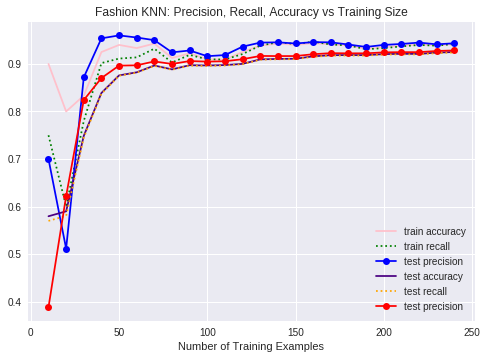

In [0]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Fashion KNN: Precision, Recall, Accuracy vs Training Size')
#plt.ylim((0,1))
ps = portions
plt.plot(ps, list(train_acc), '-',  label='train accuracy', color='pink')#
plt.plot(ps, list(train_recall), 'x', color='green', label='train recall', linestyle=':')
plt.plot(ps, list(train_precision), 'o-', color='blue', label='test precision')

plt.plot(ps, list(test_acc), '-', color='indigo',  label='test accuracy')
plt.plot(ps, list(test_recall), color='orange',  label='test recall',linestyle=':')
plt.plot(ps, list(test_precision),'o-',  color='red',  label='test precision')
plt.xlabel("Number of Training Examples")

#plt.plot(ks, list(test_recall), 'x',color='orange', label='test recall', linestyle=':')

#plt.errorbar(depth, list(cross_val_acc_avg),yerr=list(cross_val_acc_std), fmt='r', label='cross validation error')
plt.savefig('precision_recall_knn_fashion')
plt.legend()
plt.show()

In [0]:
test_acc

NameError: ignored

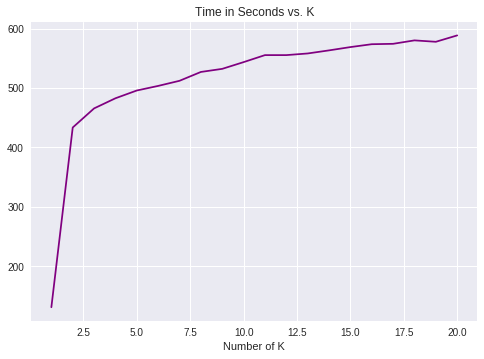

In [0]:
ks = range(1,21)
time=[131.29812097549438,433.55855226516724,465.6889326572418,482.72881031036377, 495.80009269714355,
     503.52401661872864,512.1269090175629,526.9952638149261,532.2162342071533,543.5321614742279,555.3287901878357,
     555.3287901878357,558.0933947563171,563.291341304779,568.8319599628448,573.6616265773773,574.3233530521393,580.1044759750366,
     577.7339322566986,588.4632771015167]
plt.figure();
plt.plot(ks, time, '-',  label='train accuracy', color='purple')#
plt.title('Time in Seconds vs. K');
plt.xlabel("Number of K");
#plt.ylabel('Time in Seconds');



#plt.ylim((0,1))
